# 1. Analytics Water Consumer Data

## 1.0. Initialization

In [1]:
from IPython.display import display
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')

df_dado = pd.read_csv('src/competition.csv')
df_dado.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [2]:
df_train = pd.read_csv('src/train.csv')
df_train

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,Installation_zone 2
329971,2020,12,rural domestic,0,RVZG94535208799772,Installation_zone 47
329972,2020,12,rural domestic,0,DWGA69725679861554,Installation_zone 7
329973,2020,12,rural domestic,0,VJDC45865594518045,Installation_zone 32


In [3]:
df_competition = pd.read_csv('src/competition.csv')

df_competition

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3
...,...,...,...,...,...
18274,2020,12,0,AEQZ48426066915128,Installation_zone 26
18275,2020,12,0,BMPP69449933761787,Installation_zone 17
18276,2020,12,0,XFJB02101108755437,Installation_zone 44
18277,2020,12,0,YRTP25456715504279,Installation_zone 2


## 1.1. Analytics

### 1.1.0 Preparing

In [4]:
df_analytics = df_train.copy()
map_names = {
    'Year': 'year',
    'Month': 'month',
    'Consumer_type': 'consumer_type',
    'Consumption': 'consumption',
    'Consumer_number': 'consumer_number',
    'Installation_zone': 'installation_zone',
}
df_analytics = df_analytics.rename(columns=map_names)

df_analytics.installation_zone = df_analytics.installation_zone.str.replace('Installation_zone ', '').astype(int)

df_analytics

,year,month,consumer_type,consumption,consumer_number,installation_zone
0,2013,1,domestic,0,MOGV36480546611521,1
1,2013,1,industrial,5,BECS02817768252637,2
2,2013,1,domestic,6,VRFW65577141436242,2
3,2013,1,domestic,1,QLLI18662653137621,2
4,2013,1,domestic,13,HYUO61823402850645,2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,2
329971,2020,12,rural domestic,0,RVZG94535208799772,47
329972,2020,12,rural domestic,0,DWGA69725679861554,7
329973,2020,12,rural domestic,0,VJDC45865594518045,32


### 1.1.1. Consumer Type

consumer_type
domestic               236167
rural domestic          63086
industrial              21057
rural commercial         5541
construction             2235
low income families       999
rural expansion           890
Name: count, dtype: int64


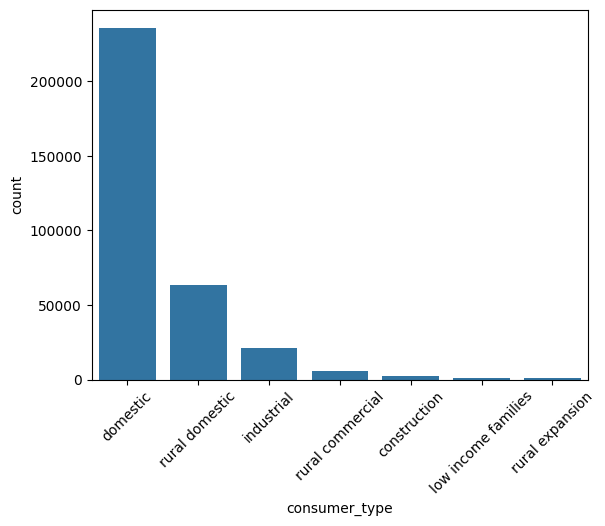

In [5]:
# graph with consumer type
import seaborn as sns

print(df_analytics.consumer_type.value_counts())
ax = sns.countplot(x='consumer_type', data=df_analytics, order=df_analytics.consumer_type.value_counts().index)
ax.tick_params(axis='x', rotation=45)

Consumer_type,construction,domestic,industrial,low income families,rural commercial,rural domestic,rural expansion
Installation_zone,,,,,,,
Installation_zone 1,230,73358,3511,322,51,0,0
Installation_zone 10,19,0,0,2,0,4157,59
Installation_zone 11,13,0,0,0,0,990,13
Installation_zone 12,11,0,10,0,0,1326,13
Installation_zone 13,9,0,0,0,0,1688,0
Installation_zone 14,6,0,0,0,0,1080,56
Installation_zone 15,0,0,0,0,0,225,0
Installation_zone 16,6,0,41,0,8,2774,0
Installation_zone 17,0,0,0,0,0,1895,51


<Axes: xlabel='installation_zone'>

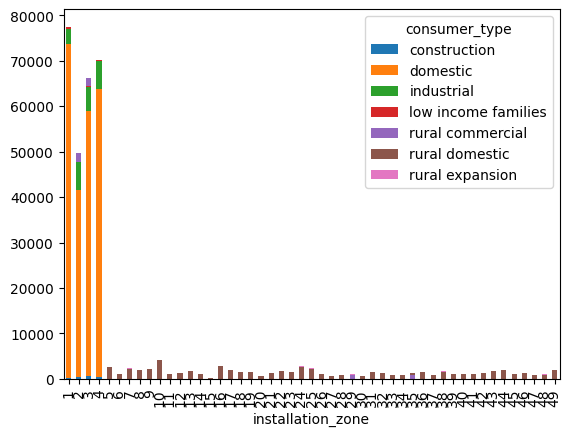

In [6]:
# Consumer Type amount by the Installation Zone

display(pd.crosstab(df_train.Installation_zone, df_train.Consumer_type))
df_analytics.groupby(['installation_zone', 'consumer_type']).size().unstack().plot(kind='bar', stacked=True)

In [7]:
# Consumption mean by Consumer Type
df_train.groupby(df_train.Consumer_type).Consumption.mean()

Consumer_type
construction            7.730201
domestic                6.810613
industrial             11.294819
low income families     9.031031
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: Consumption, dtype: float64

consumer_type
industrial             11.294819
low income families     9.031031
construction            7.730201
domestic                6.810613
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: consumption, dtype: float64

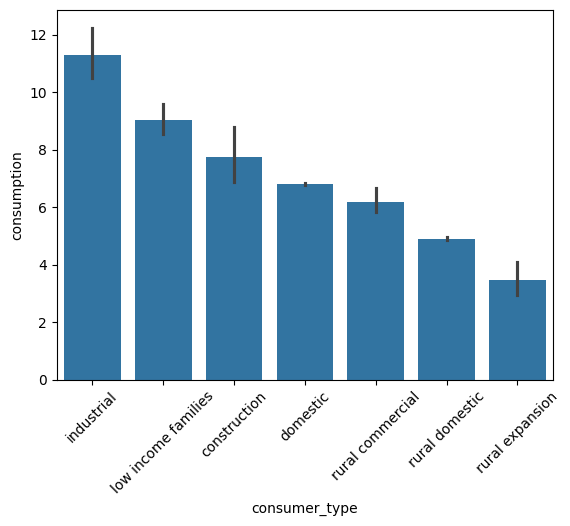

In [8]:
# Consumption mean by Consumer Type GRAPH

display(df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False))

ax = sns.barplot(x='consumer_type', y='consumption', data=df_analytics, order=df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False).index)
ax.tick_params(axis='x', rotation=45)

consumer_type
industrial             11.294819
low income families     9.031031
construction            7.730201
domestic                6.810613
rural commercial        6.162967
rural domestic          4.898583
rural expansion         3.474157
Name: consumption, dtype: float64

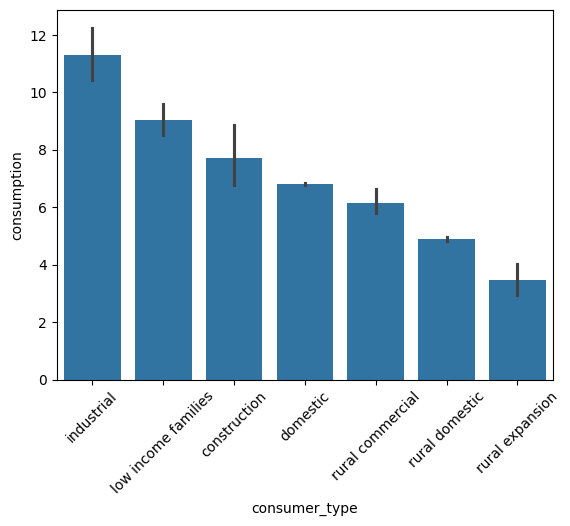

In [9]:
# Consumption mean by Consumer Type GRAPH

display(df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False))

ax = sns.barplot(x='consumer_type', y='consumption', data=df_analytics, order=df_analytics.groupby(df_analytics.consumer_type).consumption.mean().sort_values(ascending=False).index)
ax.tick_params(axis='x', rotation=45)

<Axes: >

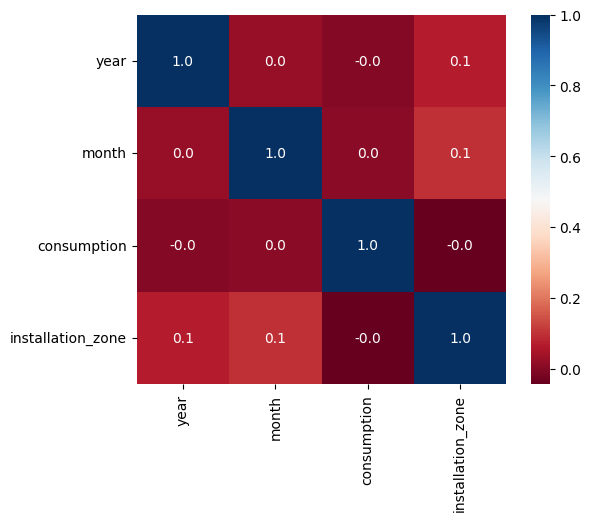

In [10]:
# Correlation Matrix
import seaborn as sns

corr = df_analytics.drop(columns=['consumer_type', 'consumer_number']).corr()
sns.heatmap(corr, cmap='RdBu', fmt='.1f', square=True, linecolor='white', annot=True)

## 2. Training Tests

### 2.0. Pré processing

In [11]:
from numpy import random

SEED = 42
random.seed(SEED)

In [12]:
from datetime import datetime

df = df_train.copy()
map_names = {
    'Year': 'year',
    'Month': 'month',
    'Consumer_type': 'consumer_type',
    'Consumption': 'consumption',
    'Consumer_number': 'consumer_number',
    'Installation_zone': 'installation_zone',
}
df = df.rename(columns=map_names)
df = df.drop(columns=['consumer_number'])
df.installation_zone = df.installation_zone.str.replace('Installation_zone ', '').astype(int)
# df['age'] = datetime.now().year - df.year
# df = df.drop(columns=['year'])

Y = df.consumer_type
X = df.drop(columns=['consumer_type'])

X

,year,month,consumption,installation_zone
0,2013,1,0,1
1,2013,1,5,2
2,2013,1,6,2
3,2013,1,1,2
4,2013,1,13,2
...,...,...,...,...
329970,2020,12,0,2
329971,2020,12,0,47
329972,2020,12,0,7
329973,2020,12,0,32


In [13]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Train size:  247481
Test size:  82494


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-1.16792715,  1.56368704, -0.34390487, -0.3672939 ],
       [-0.32661792,  1.56368704, -0.08964868, -0.55098   ],
       [ 0.93534593, -1.56594607,  0.16460752, -0.55098   ],
       ...,
       [ 1.35600055,  1.56368704, -0.34390487, -0.45913695],
       [ 0.51469131, -1.56594607, -0.14049992, -0.3672939 ],
       [ 0.0940367 , -0.99692186, -0.19135116, -0.3672939 ]])

### 2.1 Dummy Classifier

In [15]:
# dummy classifier
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(x_train, y_train)
y_pred = dummy.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_accuracy = accuracy_score(y_test, y_pred)*100
dummy_precision = precision_score(y_test, y_pred, average='macro')*100
dummy_recall = recall_score(y_test, y_pred, average='macro')*100
dummy_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {dummy_accuracy:.2f}%')
print(f'Precision: {dummy_precision:.2f}%')
print(f'Recall: {dummy_recall:.2f}%')
print(f'F1: {dummy_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 71.57%
Precision: 10.22%
Recall: 14.29%
F1: 11.92%


### 2.2. Logistic Regression

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sn

# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
logic_regression_accuracy = accuracy_score(y_test, y_pred)*100
logic_regression_precision = precision_score(y_test, y_pred, average='macro')*100
logic_regression_recall = recall_score(y_test, y_pred, average='macro')*100
logic_regression_f1 = f1_score(y_test, y_pred, average='macro')*100

# confusion = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {logic_regression_accuracy:.2f}%')
print(f'Precision: {logic_regression_precision:.2f}%')
print(f'Recall: {logic_regression_recall:.2f}%')
print(f'F1: {logic_regression_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 88.66%
Precision: 36.06%
Recall: 27.10%
F1: 26.56%


### 2.3. SVM

In [17]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear')
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# svm_accuracy = accuracy_score(y_test, y_pred)*100
# svm_precision = precision_score(y_test, y_pred, average='macro')*100
# svm_recall = recall_score(y_test, y_pred, average='macro')*100
# svm_f1 = f1_score(y_test, y_pred, average='macro')*100

# print(f'Accuracy: {svm_accuracy:.2f}%')
# print(f'Precision: {svm_precision:.2f}%')
# print(f'Recall: {svm_recall:.2f}%')
# print(f'F1: {svm_f1:.2f}%')


### 2.4. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)*100
decision_tree_precision = precision_score(y_test, y_pred, average='macro')*100
decision_tree_recall = recall_score(y_test, y_pred, average='macro')*100
decision_tree_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {decision_tree_accuracy:.2f}%')
print(f'Precision: {decision_tree_precision:.2f}%')
print(f'Recall: {decision_tree_recall:.2f}%')
print(f'F1: {decision_tree_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 90.94%
Precision: 40.00%
Recall: 30.88%
F1: 31.47%


### 2.5. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

random_forest_accuracy = accuracy_score(y_test, y_pred)*100
random_forest_precision = precision_score(y_test, y_pred, average='macro')*100
random_forest_recall = recall_score(y_test, y_pred, average='macro')*100
random_forest_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {random_forest_accuracy:.2f}%')
print(f'Precision: {random_forest_precision:.2f}%')
print(f'Recall: {random_forest_recall:.2f}%')
print(f'F1: {random_forest_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 90.67%
Precision: 26.35%
Recall: 28.56%
F1: 27.41%


### 2.6. KNeighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)*100
knn_precision = precision_score(y_test, y_pred, average='macro')*100
knn_recall = recall_score(y_test, y_pred, average='macro')*100
knn_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {knn_accuracy:.2f}%')
print(f'Precision: {knn_precision:.2f}%')
print(f'Recall: {knn_recall:.2f}%')
print(f'F1: {knn_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 90.29%
Precision: 41.26%
Recall: 32.09%
F1: 33.50%


### 2.7. Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

naive_bayes_accuracy = accuracy_score(y_test, y_pred)*100
naive_bayes_precision = precision_score(y_test, y_pred, average='macro')*100
naive_bayes_recall = recall_score(y_test, y_pred, average='macro')*100
naive_bayes_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {naive_bayes_accuracy:.2f}%')
print(f'Precision: {naive_bayes_precision:.2f}%')
print(f'Recall: {naive_bayes_recall:.2f}%')
print(f'F1: {naive_bayes_f1:.2f}%')

/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 89.43%
Precision: 32.88%
Recall: 28.33%
F1: 28.20%


## 3. Comparing

In [22]:
data = {
    'method': ['dummy', 'logistic regression', 'decision tree', 'random forest', 'knn', 'naive bayes'],
    'accuracy': [dummy_accuracy, logic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, knn_accuracy, naive_bayes_accuracy],
    'precision': [dummy_precision, logic_regression_precision, decision_tree_precision, random_forest_precision, knn_precision, naive_bayes_precision],
    'recall': [dummy_recall, logic_regression_recall, decision_tree_recall, random_forest_recall, knn_recall, naive_bayes_recall],
    'f1': [dummy_f1, logic_regression_f1, decision_tree_f1, random_forest_f1, knn_f1, naive_bayes_f1]
}

df_results = pd.DataFrame(data)
df_results

,method,accuracy,precision,recall,f1
0,dummy,71.571266,10.224467,14.285714,11.918623
1,logistic regression,88.660994,36.062478,27.096171,26.557315
2,decision tree,90.935098,39.997301,30.876690,31.465136
3,random forest,90.667200,26.354072,28.559529,27.406829
4,knn,90.287779,41.257925,32.087628,33.496105
5,naive bayes,89.427110,32.881048,28.330407,28.199337
